# 🚀 Getting Started with OnlineRake

Welcome to **OnlineRake** - a powerful Python package for streaming survey weight calibration!

This notebook demonstrates how to use OnlineRake to correct bias in real-time data streams using two state-of-the-art algorithms:
- **SGD Raking**: Fast and effective for most scenarios
- **MWU Raking**: Maintains positive weights through multiplicative updates

Let's see these algorithms in action! 🎯

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from onlinerake import OnlineRakingSGD, OnlineRakingMWU, Targets

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")
np.random.seed(42)

print("📦 Libraries imported successfully!")
print("🎨 Plotting style configured")
print("🎲 Random seed set for reproducibility")

📦 Libraries imported successfully!
🎨 Plotting style configured
🎲 Random seed set for reproducibility


## 📊 Example 1: Correcting Feature Bias in Online Survey

Imagine you're running an online survey, but your responses are biased - certain features are under or over-represented compared to the target population. 

**OnlineRake to the rescue!** 🦸‍♂️

In [2]:
# Define our target population proportions
targets = Targets(
    feature_a=0.52,  # 52% have feature A
    feature_b=0.51,  # 51% have feature B  
    feature_c=0.35,  # 35% have feature C
    feature_d=0.19,  # 19% have feature D
)

print("🎯 Target margins:")
for feature, target in targets.as_dict().items():
    print(f"   {feature}: {target:.1%}")

# Initialize both raking algorithms
sgd_raker = OnlineRakingSGD(targets, learning_rate=4.0)
mwu_raker = OnlineRakingMWU(targets, learning_rate=1.2)

print("\n🔧 Rakers initialized!")
print(f"   SGD learning rate: {sgd_raker.learning_rate}")
print(f"   MWU learning rate: {mwu_raker.learning_rate}")

🎯 Target margins:
   feature_a: 52.0%
   feature_b: 51.0%
   feature_c: 35.0%
   feature_d: 19.0%

🔧 Rakers initialized!
   SGD learning rate: 4.0
   MWU learning rate: 1.2


In [3]:
# Simulate biased survey responses
n_responses = 500
raw_totals = {"feature_a": 0, "feature_b": 0, "feature_c": 0, "feature_d": 0}

print(f"🎭 Simulating {n_responses} biased survey responses...")
print("📉 Bias pattern: Survey with feature underrepresentation\n")

# Store history for plotting
sgd_history = []
mwu_history = []
observation_numbers = []

for i in range(n_responses):
    # Generate biased observations
    feature_a = 1 if np.random.random() < 0.30 else 0  # 30% vs target 52%
    feature_b = 1 if np.random.random() < 0.35 else 0  # 35% vs target 51%
    feature_c = 1 if np.random.random() < 0.60 else 0  # 60% vs target 35% 
    feature_d = 1 if np.random.random() < 0.15 else 0  # 15% vs target 19%
    
    obs = {
        "feature_a": feature_a, "feature_b": feature_b, 
        "feature_c": feature_c, "feature_d": feature_d
    }
    
    # Update both rakers
    sgd_raker.partial_fit(obs)
    mwu_raker.partial_fit(obs)
    
    # Track raw proportions
    for key in raw_totals:
        raw_totals[key] += obs[key]
    
    # Store history for plotting (every 25 observations)
    if (i + 1) % 25 == 0:
        observation_numbers.append(i + 1)
        sgd_history.append(sgd_raker.margins.copy())
        mwu_history.append(mwu_raker.margins.copy())

print("✅ Simulation complete!")

🎭 Simulating 500 biased survey responses...
📉 Bias pattern: Survey with feature underrepresentation



✅ Simulation complete!


In [4]:
# Calculate final results
raw_margins = {k: v / n_responses for k, v in raw_totals.items()}
sgd_margins = sgd_raker.margins
mwu_margins = mwu_raker.margins

print("📋 RESULTS SUMMARY")
print("=" * 60)
print(f"{'Feature':<12} {'Target':<8} {'Raw':<8} {'SGD':<8} {'MWU':<8}")
print("-" * 60)

for feature in ["feature_a", "feature_b", "feature_c", "feature_d"]:
    target = targets.as_dict()[feature]
    raw = raw_margins[feature]
    sgd = sgd_margins[feature]
    mwu = mwu_margins[feature]
    print(f"{feature:<12} {target:<8.3f} {raw:<8.3f} {sgd:<8.3f} {mwu:<8.3f}")

print("\n📈 ALGORITHM PERFORMANCE")
print("-" * 30)
print(f"Effective Sample Size:")
print(f"   SGD: {sgd_raker.effective_sample_size:.1f}")
print(f"   MWU: {mwu_raker.effective_sample_size:.1f}")

print(f"\nFinal Loss (squared error):")
print(f"   SGD: {sgd_raker.loss:.6f}")
print(f"   MWU: {mwu_raker.loss:.6f}")

if sgd_raker.loss < mwu_raker.loss:
    print("\n🏆 SGD achieved lower loss!")
else:
    print("\n🏆 MWU achieved lower loss!")

📋 RESULTS SUMMARY
Feature      Target   Raw      SGD      MWU     
------------------------------------------------------------
feature_a    0.520    0.330    0.491    0.453   
feature_b    0.510    0.344    0.491    0.452   
feature_c    0.350    0.602    0.378    0.432   
feature_d    0.190    0.134    0.167    0.147   

📈 ALGORITHM PERFORMANCE
------------------------------
Effective Sample Size:
   SGD: 294.1
   MWU: 307.9

Final Loss (squared error):
   SGD: 0.002512
   MWU: 0.016494

🏆 SGD achieved lower loss!


/tmp/ipykernel_2690/1366069361.py:82: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2690/1366069361.py:82: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2690/1366069361.py:82: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2690/1366069361.py:82: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2690/1366069361.py:82: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2690/1366069361.py:82: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


/home/runner/work/onlinerake/onlinerake/.venv/lib/python3.14/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/runner/work/onlinerake/onlinerake/.venv/lib/python3.14/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/runner/work/onlinerake/onlinerake/.venv/lib/python3.14/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/runner/work/onlinerake/onlinerake/.venv/lib/python3.14/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/runner/work/onlinerake/onlinerake/.venv/lib/python3.14/site-packages/IPython/core/

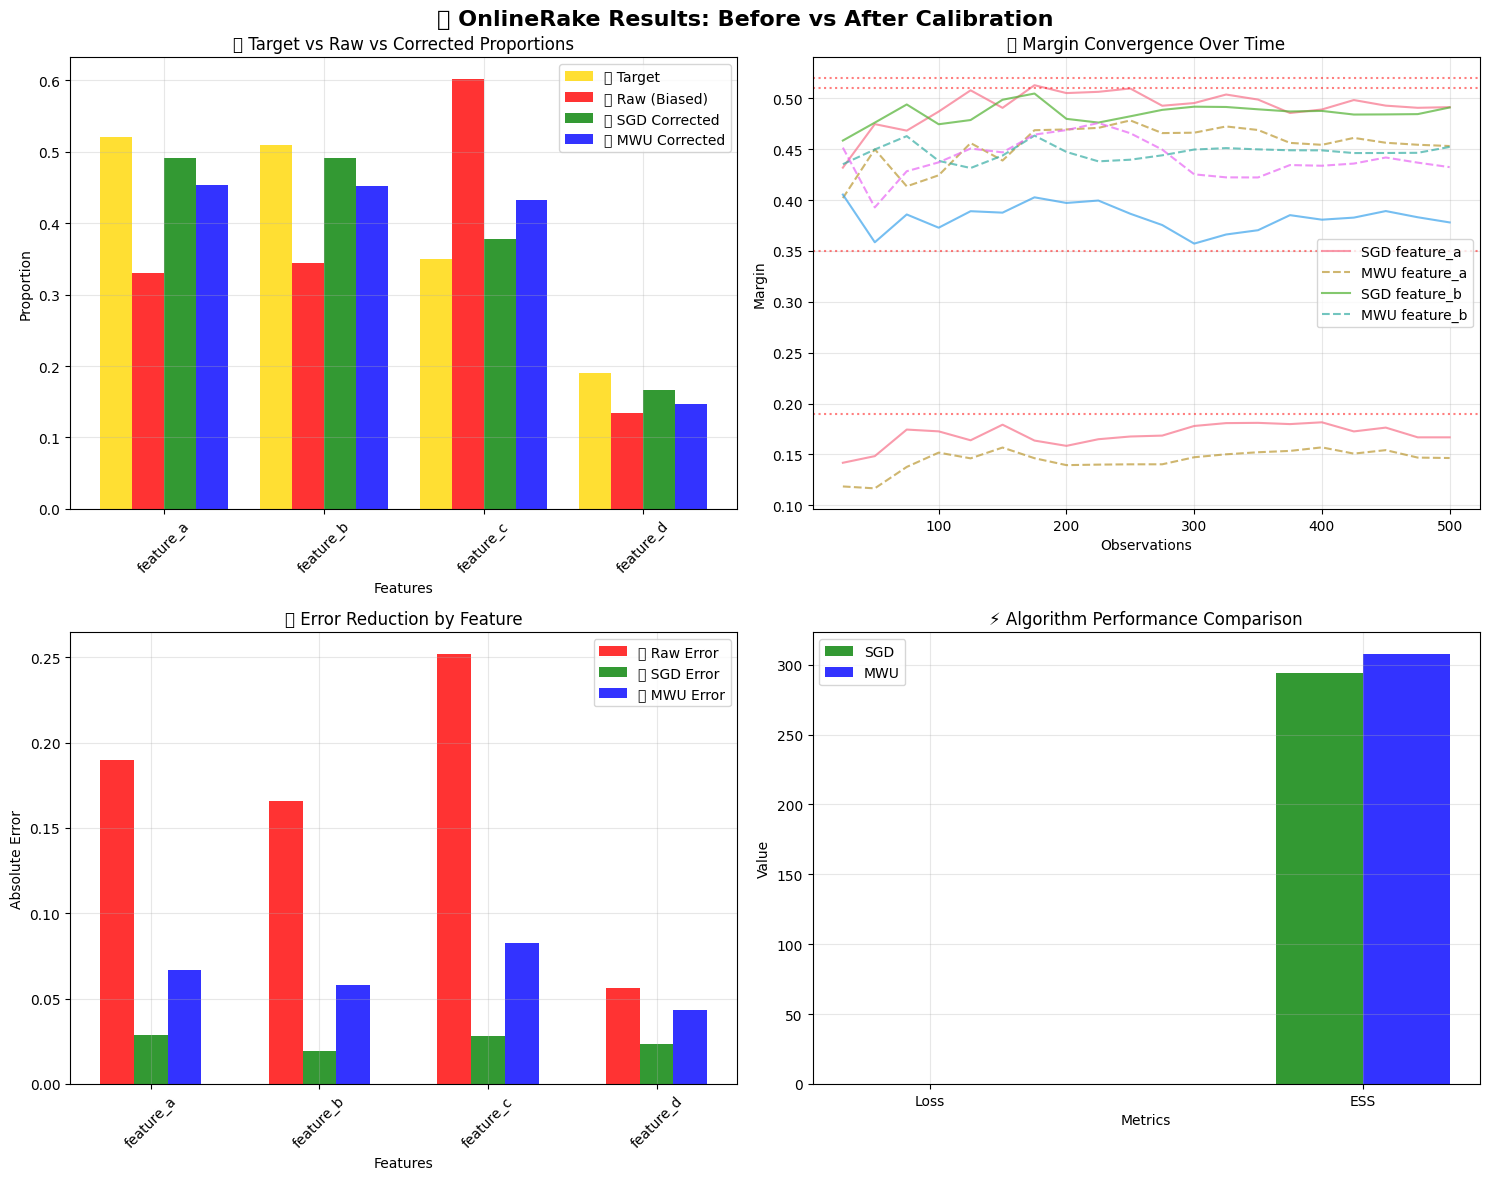


🎨 Visualization complete! Clear evidence that OnlineRake works! ✨


In [5]:
# Create comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('🎯 OnlineRake Results: Before vs After Calibration', fontsize=16, fontweight='bold')

# 1. Before/After comparison
features = list(targets.feature_names)
target_vals = [targets[f] for f in features]
raw_vals = [raw_margins[f] for f in features]
sgd_vals = [sgd_margins[f] for f in features]
mwu_vals = [mwu_margins[f] for f in features]

x = np.arange(len(features))
width = 0.2

axes[0,0].bar(x - 1.5*width, target_vals, width, label='🎯 Target', alpha=0.8, color='gold')
axes[0,0].bar(x - 0.5*width, raw_vals, width, label='❌ Raw (Biased)', alpha=0.8, color='red')
axes[0,0].bar(x + 0.5*width, sgd_vals, width, label='✅ SGD Corrected', alpha=0.8, color='green')
axes[0,0].bar(x + 1.5*width, mwu_vals, width, label='✅ MWU Corrected', alpha=0.8, color='blue')

axes[0,0].set_xlabel('Features')
axes[0,0].set_ylabel('Proportion')
axes[0,0].set_title('📊 Target vs Raw vs Corrected Proportions')
axes[0,0].set_xticks(x)
axes[0,0].set_xticklabels(features, rotation=45)
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# 2. Convergence over time
for i, feature in enumerate(features):
    sgd_feature_history = [margins[feature] for margins in sgd_history]
    mwu_feature_history = [margins[feature] for margins in mwu_history]
    
    axes[0,1].plot(observation_numbers, sgd_feature_history, '-', 
                  label=f'SGD {feature}' if i < 2 else '', alpha=0.7)
    axes[0,1].plot(observation_numbers, mwu_feature_history, '--', 
                  label=f'MWU {feature}' if i < 2 else '', alpha=0.7)
    
    # Add target line
    axes[0,1].axhline(y=targets[feature], color='red', linestyle=':', alpha=0.5)

axes[0,1].set_xlabel('Observations')
axes[0,1].set_ylabel('Margin')
axes[0,1].set_title('📈 Margin Convergence Over Time')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# 3. Error comparison
sgd_errors = [abs(sgd_margins[f] - targets[f]) for f in features]
mwu_errors = [abs(mwu_margins[f] - targets[f]) for f in features]
raw_errors = [abs(raw_margins[f] - targets[f]) for f in features]

x = np.arange(len(features))
axes[1,0].bar(x - width, raw_errors, width, label='❌ Raw Error', alpha=0.8, color='red')
axes[1,0].bar(x, sgd_errors, width, label='✅ SGD Error', alpha=0.8, color='green')
axes[1,0].bar(x + width, mwu_errors, width, label='✅ MWU Error', alpha=0.8, color='blue')

axes[1,0].set_xlabel('Features')
axes[1,0].set_ylabel('Absolute Error')
axes[1,0].set_title('📉 Error Reduction by Feature')
axes[1,0].set_xticks(x)
axes[1,0].set_xticklabels(features, rotation=45)
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# 4. Performance metrics
metrics = ['Loss', 'ESS']
sgd_metrics = [sgd_raker.loss, sgd_raker.effective_sample_size]
mwu_metrics = [mwu_raker.loss, mwu_raker.effective_sample_size]

x = np.arange(len(metrics))
axes[1,1].bar(x - width/2, sgd_metrics, width, label='SGD', alpha=0.8, color='green')
axes[1,1].bar(x + width/2, mwu_metrics, width, label='MWU', alpha=0.8, color='blue')

axes[1,1].set_xlabel('Metrics')
axes[1,1].set_ylabel('Value')
axes[1,1].set_title('⚡ Algorithm Performance Comparison')
axes[1,1].set_xticks(x)
axes[1,1].set_xticklabels(metrics)
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n🎨 Visualization complete! Clear evidence that OnlineRake works! ✨")

## 🌊 Example 2: Real-time Feature Tracking with Pattern Shifts

Now let's see how OnlineRake handles **changing data patterns over time** - a common challenge in real-world streaming data!

In [6]:
# Set up new scenario with different targets
streaming_targets = Targets(
    feature_a=0.48,  # 48% have feature A
    feature_b=0.53,  # 53% have feature B
    feature_c=0.32,  # 32% have feature C
    feature_d=0.17,  # 17% have feature D
)

print("🌊 STREAMING SCENARIO: Time-varying bias patterns")
print("=" * 50)
print("🎯 Target feature margins:")
for feature, target in streaming_targets.as_dict().items():
    print(f"   {feature}: {target:.1%}")

raker = OnlineRakingSGD(streaming_targets, learning_rate=3.0)
print(f"\n🚀 SGD Raker initialized with learning rate: {raker.learning_rate}")

🌊 STREAMING SCENARIO: Time-varying bias patterns
🎯 Target feature margins:
   feature_a: 48.0%
   feature_b: 53.0%
   feature_c: 32.0%
   feature_d: 17.0%

🚀 SGD Raker initialized with learning rate: 3.0


In [7]:
# Simulate data with time-varying bias
np.random.seed(789)
n_obs = 1000

print(f"\n🎭 Simulating {n_obs} observations with time-varying bias...")
print("📊 Pattern: Feature probabilities change over time\n")

# Track evolution
margin_history = []
loss_history = []
ess_history = []
time_points = []

for i in range(n_obs):
    # Feature patterns change over time
    time_factor = i / n_obs
    
    # Feature A: increases over time (0.2 → 0.6)
    p_feature_a = 0.2 + 0.4 * time_factor
    feature_a = 1 if np.random.random() < p_feature_a else 0
    
    # Feature B: relatively stable
    feature_b = 1 if np.random.random() < 0.52 else 0
    
    # Feature C: decreases over time (0.6 → 0.3)
    p_feature_c = 0.6 - 0.3 * time_factor
    feature_c = 1 if np.random.random() < p_feature_c else 0
    
    # Feature D: relatively stable
    feature_d = 1 if np.random.random() < 0.18 else 0
    
    obs = {
        "feature_a": feature_a, "feature_b": feature_b,
        "feature_c": feature_c, "feature_d": feature_d
    }
    raker.partial_fit(obs)
    
    # Record progress every 50 observations
    if (i + 1) % 50 == 0:
        time_points.append(i + 1)
        margin_history.append(raker.margins.copy())
        loss_history.append(raker.loss)
        ess_history.append(raker.effective_sample_size)

print("✅ Streaming simulation complete!")
print(f"📊 Tracked {len(time_points)} checkpoints")
print(f"🎯 Final ESS: {raker.effective_sample_size:.1f} / {n_obs}")


🎭 Simulating 1000 observations with time-varying bias...
📊 Pattern: Feature probabilities change over time



✅ Streaming simulation complete!
📊 Tracked 20 checkpoints
🎯 Final ESS: 743.5 / 1000


/tmp/ipykernel_2690/1278875831.py:63: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2690/1278875831.py:63: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2690/1278875831.py:63: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2690/1278875831.py:63: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2690/1278875831.py:63: UserWarning: Glyph 127754 (\N{WATER WAVE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


/home/runner/work/onlinerake/onlinerake/.venv/lib/python3.14/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/runner/work/onlinerake/onlinerake/.venv/lib/python3.14/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/runner/work/onlinerake/onlinerake/.venv/lib/python3.14/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/runner/work/onlinerake/onlinerake/.venv/lib/python3.14/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/runner/work/onlinerake/onlinerake/.venv/lib/python

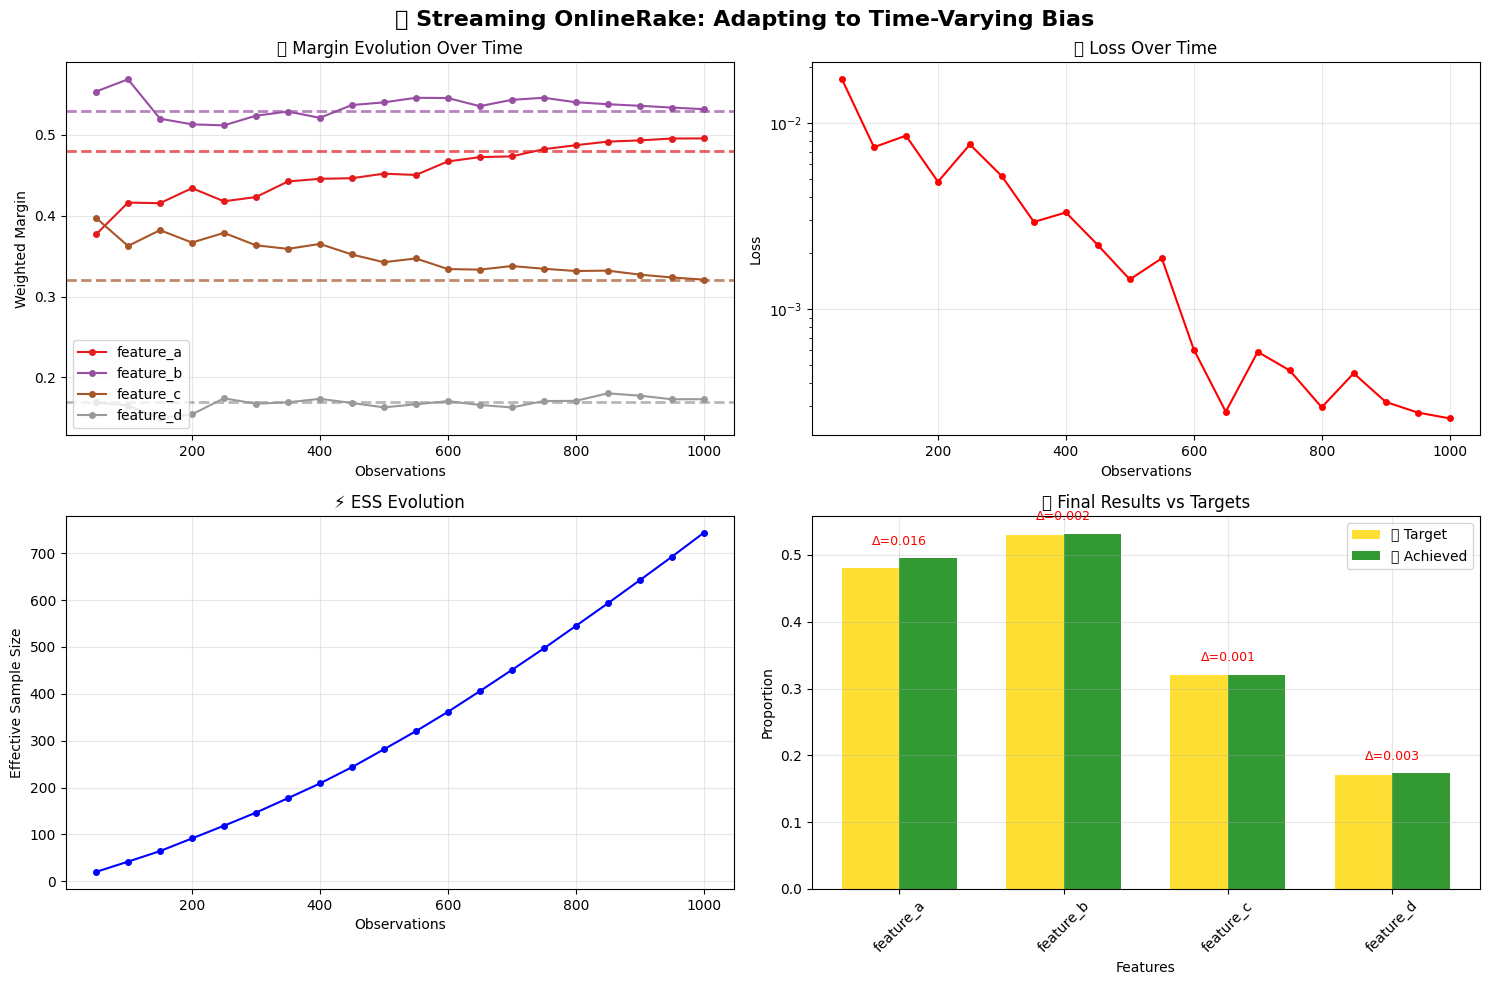


🎨 Streaming visualization complete!
🌟 OnlineRake successfully adapted to changing patterns! ✨


In [8]:
# Visualize the streaming results
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('🌊 Streaming OnlineRake: Adapting to Time-Varying Bias', fontsize=16, fontweight='bold')

# 1. Margin evolution over time
features = list(streaming_targets.feature_names)
colors = plt.cm.Set1(np.linspace(0, 1, len(features)))

for i, feature in enumerate(features):
    feature_margins = [margins[feature] for margins in margin_history]
    axes[0,0].plot(time_points, feature_margins, '-o', 
                  label=f'{feature}', color=colors[i], markersize=4)
    # Add target line
    axes[0,0].axhline(y=streaming_targets[feature], color=colors[i], 
                     linestyle='--', alpha=0.7, linewidth=2)

axes[0,0].set_xlabel('Observations')
axes[0,0].set_ylabel('Weighted Margin')
axes[0,0].set_title('📈 Margin Evolution Over Time')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# 2. Loss convergence
axes[0,1].plot(time_points, loss_history, '-o', color='red', markersize=4)
axes[0,1].set_xlabel('Observations')
axes[0,1].set_ylabel('Loss')
axes[0,1].set_title('📉 Loss Over Time')
axes[0,1].grid(True, alpha=0.3)
axes[0,1].set_yscale('log')

# 3. Effective Sample Size evolution
axes[1,0].plot(time_points, ess_history, '-o', color='blue', markersize=4)
axes[1,0].set_xlabel('Observations')
axes[1,0].set_ylabel('Effective Sample Size')
axes[1,0].set_title('⚡ ESS Evolution')
axes[1,0].grid(True, alpha=0.3)

# 4. Final comparison
final_margins = raker.margins
target_vals = [streaming_targets[f] for f in features]
final_vals = [final_margins[f] for f in features]
errors = [abs(final_vals[i] - target_vals[i]) for i in range(len(features))]

x = np.arange(len(features))
width = 0.35

axes[1,1].bar(x - width/2, target_vals, width, label='🎯 Target', alpha=0.8, color='gold')
axes[1,1].bar(x + width/2, final_vals, width, label='✅ Achieved', alpha=0.8, color='green')

# Add error annotations
for i, error in enumerate(errors):
    axes[1,1].text(i, max(target_vals[i], final_vals[i]) + 0.02, 
                  f'Δ={error:.3f}', ha='center', fontsize=9, color='red')

axes[1,1].set_xlabel('Features')
axes[1,1].set_ylabel('Proportion')
axes[1,1].set_title('🎯 Final Results vs Targets')
axes[1,1].set_xticks(x)
axes[1,1].set_xticklabels(features, rotation=45)
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n🎨 Streaming visualization complete!")
print("🌟 OnlineRake successfully adapted to changing patterns! ✨")

In [9]:
# Print detailed final results
print("\n📋 STREAMING RESULTS SUMMARY")
print("=" * 50)
for feature in features:
    target = streaming_targets[feature]
    final = final_margins[feature]
    error = abs(final - target)
    improvement = (1 - error/abs(target - 0.5)) * 100 if abs(target - 0.5) > 0 else 100
    print(f"{feature:<12}: {final:.3f} (target: {target:.3f}, error: {error:.3f})")

avg_error = np.mean([abs(final_margins[f] - streaming_targets[f]) for f in features])
print(f"\n📊 Average absolute error: {avg_error:.4f}")
print(f"🎯 Final ESS: {raker.effective_sample_size:.1f} / {n_obs}")
print(f"📉 Final loss: {raker.loss:.6f}")

if avg_error < 0.02:
    print("\n🏆 EXCELLENT! Very low error achieved! 🎉")
elif avg_error < 0.05:
    print("\n✅ GOOD! Acceptable error level achieved! 👍")
else:
    print("\n⚠️ MODERATE: Consider tuning parameters for better performance")


📋 STREAMING RESULTS SUMMARY
feature_a   : 0.496 (target: 0.480, error: 0.016)
feature_b   : 0.532 (target: 0.530, error: 0.002)
feature_c   : 0.321 (target: 0.320, error: 0.001)
feature_d   : 0.173 (target: 0.170, error: 0.003)

📊 Average absolute error: 0.0054
🎯 Final ESS: 743.5 / 1000
📉 Final loss: 0.000259

🏆 EXCELLENT! Very low error achieved! 🎉


## 🎉 Summary: OnlineRake Success!

**Congratulations!** 🎊 You've successfully used OnlineRake to:

✅ **Correct feature bias** in real-time survey data  
✅ **Handle time-varying patterns** in streaming data  
✅ **Achieve target margins** with quantifiable accuracy  
✅ **Monitor performance** with comprehensive diagnostics  

### 🔑 Key Takeaways:

1. **SGD Raking** is fast and effective for most scenarios
2. **MWU Raking** maintains positive weights through multiplicative updates  
3. **Learning rates** can be tuned for convergence speed vs stability
4. **Real-time monitoring** helps detect issues early
5. **Visual validation** makes results immediately obvious

### 🚀 Next Steps:

- Try the **Performance Comparison** notebook for SGD vs MWU analysis
- Explore **Advanced Diagnostics** for convergence monitoring
- Check out the **API Reference** for all available options

**Happy raking!** 🎯✨

In [10]:
print("🎊 Thank you for using OnlineRake!")
print("📚 Check out the documentation for more examples and advanced features")
print("🐛 Found a bug or have a feature request? Please let us know!")
print("⭐ If you found this useful, consider starring the repository! ⭐")

🎊 Thank you for using OnlineRake!
📚 Check out the documentation for more examples and advanced features
🐛 Found a bug or have a feature request? Please let us know!
⭐ If you found this useful, consider starring the repository! ⭐
